# Application of Machine Learning Methods to Analysis of Cyber-Sport Events
## Dmitry Savostyanov, 131

## Витрина данных по участникам Kiev Major

## Финальный файл скрипта: ABT_[DATE].csv

В данном скрипте представлена таблица по командам, которые указаны в файле Dota Features & Snippets - Roles.csv за период с 1 января 2017 года по сегодняшний день. Строка таблицы - информация о матче на уровне игрока. Т.е. если между IG и LGD был матч с match_id = 12345, то таблица содержит 10 записей с данным идентификаторм для каждого конкретного account_id.

In [2]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [1]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0D%0A%0D%0A%0D%0A--%20Basic%20table%0D%0Amatches.match_id%2C%0D%0Aplayer_matches.account_id%2C%0D%0Ateams.team_id%2C%0D%0Amatches.leagueid%2C%0D%0Aleagues.name%20leaguename%2C%0D%0Amatches.start_time%2C%0D%0Aplayer_matches.hero_id%2C%0D%0Aplayer_matches.player_slot%2C%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20true)%20radiant%2C%20--new%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20false)%20dire%2C%20--new%0D%0Aplayer_matches.kills%2C%0D%0Aplayer_matches.deaths%2C%0D%0Aplayer_matches.assists%2C%0D%0Aplayer_matches.gold_per_min%20%2C%0D%0Aplayer_matches.xp_per_min%20%2C%0D%0Aplayer_matches.gold_spent%20%2C%0D%0Aplayer_matches.hero_damage%20%2C%0D%0Aplayer_matches.tower_damage%20%2C%0D%0Aplayer_matches.stuns%20%2C%0D%0Aplayer_matches.creeps_stacked%20%2C%0D%0Aplayer_matches.camps_stacked%20%2C%0D%0Aplayer_matches.hero_healing%20%2C%0D%0Aplayer_matches.last_hits%2C%0D%0Aplayer_matches.denies%2C%0D%0Aplayer_matches.level%2C%0D%0Amatches.duration%2C%0D%0Amatches.cluster%2C%0D%0Amatches.first_blood_time%2C%0D%0A%0D%0A--timeStamp%20variables%0D%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0D%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0D%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0D%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0D%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0D%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0D%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0D%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0D%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0D%0A%0D%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0D%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0D%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0D%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0D%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0D%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0D%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0D%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0D%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0D%0A%0D%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0D%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0D%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0D%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0D%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0D%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0D%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0D%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0D%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0D%0A%0D%0Aplayer_matches.pings%20ping_log%2C%0D%0Aplayer_matches.obs_log%2C%0D%0Aplayer_matches.sen_log%2C%0D%0Aplayer_matches.runes_log%2C%0D%0Aplayer_matches.kills_log%2C%0D%0Aplayer_matches.buyback_log%2C%0D%0A%0D%0A--table_heroStats%0D%0Aheroes.localized_name%2C%0D%0Aheroes.attack_type%2C%0D%0Aheroes.primary_attr%2C%0D%0Aheroes.roles%20role_log%2C%0D%0A%0D%0A--purchase_log%0D%0Aplayer_matches.purchase_log%0D%0A%0D%0AFROM%20matches%0D%0AJOIN%20match_patch%20using(match_id)%0D%0AJOIN%20leagues%20using(leagueid)%0D%0AJOIN%20player_matches%20using(match_id)%0D%0ALEFT%20JOIN%20notable_players%20using(account_id)%0D%0ALEFT%20JOIN%20teams%20using(team_id)%0D%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0D%0A%0D%0AJOIN%0D%0A(%0D%0A%20%20%20%20SELECT%0D%0A%20%20%20%20%0D%0A%20%20%20%20DISTINCT%20matches.match_id%0D%0A%20%20%20%20%0D%0A%20%20%20%20FROM%20matches%0D%0A%20%20%20%20JOIN%20match_patch%20using(match_id)%0D%0A%20%20%20%20JOIN%20leagues%20using(leagueid)%0D%0A%20%20%20%20JOIN%20player_matches%20using(match_id)%0D%0A%20%20%20%20LEFT%20JOIN%20notable_players%20using(account_id)%0D%0A%20%20%20%20LEFT%20JOIN%20teams%20using(team_id)%0D%0A%20%20%20%20JOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0D%0A%20%20%20%20%0D%0A%20%20%20%20WHERE%20TRUE%0D%0A%20%20%20%20AND%20teams.team_id%20in%0D%0A%20%20%20%20%20%20%20%20(%0D%0A%20%20%20%20%20%20%20%20%20%205%2C%0D%0A%20%20%20%20%09%20%2026%2C%0D%0A%20%20%20%20%09%20%2039%2C%0D%0A%20%20%20%20%09%20%202163%2C%0D%0A%20%20%20%20%09%20%201375614%2C%0D%0A%20%20%20%20%09%20%201836806%2C%0D%0A%20%20%20%20%09%20%201883502%2C%0D%0A%20%20%20%20%09%20%202108395%2C%0D%0A%20%20%20%20%09%20%202512249%2C%0D%0A%20%20%20%20%09%20%202586976%2C%0D%0A%20%20%20%20%09%20%202640025%2C%0D%0A%20%20%20%20%09%20%202642171%2C%0D%0A%20%20%20%20%09%20%203326875%2C%0D%0A%20%20%20%20%09%20%203722973%2C%0D%0A%20%20%20%20%09%20%203580606%2C%0D%0A%20%20%20%20%09%20%203547682%2C%0D%0A%20%20%20%20%09%20%204253054%2C%0D%0A%20%20%20%20%09%20%204251435%2C%0D%0A%20%20%20%20%09%20%201838315%0D%0A%20%20%20%20%20%20%20%20)%0D%0A%20%20%20%20AND%20matches.start_time%20%3E%3D%201483218000%0D%0A%20%20%20%20ORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0D%0A%20%20%20%20LIMIT%201000%0D%0A)%20t1%20ON%20matches.match_id%20%3D%20t1.match_id%0D%0A%0D%0A%0D%0AWHERE%20TRUE%0D%0AAND%20teams.team_id%20!%3D%200%0D%0AAND%20matches.start_time%20%3E%3D%201483218000%0D%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST"

# Загружаем данные в формате json, парсим и сохраняем в Pandas

Предварительно ссылку стоит открыть в браузере, иначе она не хочет грузиться (слишком большая?)

In [3]:
response = urllib2.urlopen(urlQuery)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)
matches = pd.DataFrame.from_dict(dictData['rows'])

# Добавляем уникальный идентификатор matchId_accountId и дату

In [4]:
matches['id'] = matches['match_id'].astype('str') + "_" + matches['account_id'].astype('str')
print matches.shape
matches['datetime'] = matches["start_time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d.%m.%Y %H:%M:%S'))

(7000, 68)


# Список переменных

In [5]:
list(matches)

[u'account_id',
 u'assists',
 u'attack_type',
 u'buyback_log',
 u'camps_stacked',
 u'cluster',
 u'creeps_stacked',
 u'deaths',
 u'denies',
 u'dire',
 u'duration',
 u'first_blood_time',
 u'gold_per_min',
 u'gold_spent',
 u'hero_damage',
 u'hero_healing',
 u'hero_id',
 u'kills',
 u'kills_log',
 u'last_hits',
 u'leagueid',
 u'leaguename',
 u'level',
 u'localized_name',
 u'match_id',
 u'obs_log',
 u'ping_log',
 u'player_slot',
 u'primary_attr',
 u'purchase_log',
 u'radiant',
 u'role_log',
 u'runes_log',
 u'sen_log',
 u'start_time',
 u'stuns',
 u't_experience_cnt_10',
 u't_experience_cnt_12',
 u't_experience_cnt_15',
 u't_experience_cnt_20',
 u't_experience_cnt_25',
 u't_experience_cnt_3',
 u't_experience_cnt_30',
 u't_experience_cnt_5',
 u't_experience_cnt_8',
 u't_gold_cnt_10',
 u't_gold_cnt_12',
 u't_gold_cnt_15',
 u't_gold_cnt_20',
 u't_gold_cnt_25',
 u't_gold_cnt_3',
 u't_gold_cnt_30',
 u't_gold_cnt_5',
 u't_gold_cnt_8',
 u't_lasthits_cnt_10',
 u't_lasthits_cnt_12',
 u't_lasthits_cnt_1

In [6]:
matches.head()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
0,140153524,13,Ranged,[],0.0,224,0.0,7,2,False,...,1.0,40.0,3.0,5.0,5,556,True,364,3122034132_140153524,16.04.2017 15:38:58
1,205813150,12,Ranged,[],0.0,224,0.0,7,11,False,...,11.0,206.0,22.0,43.0,5,5555,True,546,3122034132_205813150,16.04.2017 15:38:58
2,129958758,13,Melee,"[{u'slot': 2, u'type': u'buyback_log', u'playe...",0.0,224,0.0,5,21,False,...,8.0,146.0,22.0,40.0,5,2018,True,541,3122034132_129958758,16.04.2017 15:38:58
3,207829314,13,Melee,"[{u'slot': 3, u'type': u'buyback_log', u'playe...",0.0,224,0.0,7,9,False,...,1.0,74.0,5.0,6.0,5,1343,True,377,3122034132_207829314,16.04.2017 15:38:58
4,90892734,14,Ranged,"[{u'slot': 4, u'type': u'buyback_log', u'playe...",0.0,224,0.0,6,14,False,...,5.0,81.0,7.0,18.0,5,2601,True,403,3122034132_90892734,16.04.2017 15:38:58


In [7]:
matches.tail()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
6995,91698091,13,Melee,[],0.0,224,0.0,8,5,True,...,12.0,139.0,18.0,29.0,3547682,2418,True,551,2886231602_91698091,01.01.2017 11:01:09
6996,137272985,18,Ranged,[],3.0,224,6.0,6,1,True,...,5.0,191.0,16.0,28.0,3547682,69,True,427,2886231602_137272985,01.01.2017 11:01:09
6997,113800818,15,Ranged,"[{u'slot': 7, u'type': u'buyback_log', u'playe...",0.0,224,0.0,5,1,True,...,0.0,31.0,0.0,0.0,3547682,525,True,393,2886231602_113800818,01.01.2017 11:01:09
6998,101695162,18,Melee,[],0.0,224,0.0,1,5,True,...,0.0,43.0,4.0,5.0,3547682,264,True,439,2886231602_101695162,01.01.2017 11:01:09
6999,130416036,7,Melee,[],0.0,224,0.0,1,6,True,...,10.0,213.0,21.0,38.0,3547682,6807,True,547,2886231602_130416036,01.01.2017 11:01:09


# Parse Items Timing

In [8]:
t_item = dict()
itemList = [
            'blink',
            'power_treads',
            'ultimate_scepter',
            'phase_boots',
            'travel_boots',
            'blade_mail',
            'arcane_boots',
            'black_king_bar',
            'desolator',
            'magic_wand',
            'tranquil_boots',
            'invis_sword',
            'echo_sabre',
            'manta',
            'ring_of_aquila',
            'force_staff',
            'aether_lens',
            'wind_lace',
            'silver_edge',
            'hand_of_midas',
            'sphere',
            'boots',
            'hurricane_pike',
            'bottle'            
            ]
columnNames = ['id']

for item in itemList:
    columnNames.append("t_item_" + item)

items = pd.DataFrame(columns = columnNames)
    
for i in range(0, len(matches['purchase_log'])):
    
    purchaseList = matches['purchase_log'][i]     
    for item in itemList:
        columnName = "t_item_" + item
        t_item[columnName] = np.nan
        
    if purchaseList is not None:
        for purchase in purchaseList:
            for item in itemList:
                columnName = "t_item_" + item
                if purchase['key'] == item and purchase['time'] < 30*60:
                    t_item[columnName] = purchase['time']
                    unique_id = matches['match_id'][i].astype('str') + "_" + matches['account_id'][i].astype('str')
                    t_item['id'] = unique_id
        itemsRow = pd.DataFrame.from_dict(t_item, orient = 'index').transpose()
        items = items.append(itemsRow, ignore_index=True)           
    else: print "Line %s: Log does not exists" %i

Line 2562: Log does not exists
Line 2563: Log does not exists
Line 2564: Log does not exists
Line 2565: Log does not exists
Line 2566: Log does not exists
Line 2567: Log does not exists
Line 2568: Log does not exists
Line 2569: Log does not exists
Line 2570: Log does not exists
Line 2571: Log does not exists


In [9]:
items.shape

(6990, 25)

In [10]:
matches = matches.merge(items, left_on='id', right_on='id', how='inner')
matches.shape

(6990, 93)

73 записи было удалено из таблицы в связи с отсутствием логов о покупках игроков.

# First Kill Timing (Время в секундах от старта первой пачки крипов)

In [11]:
for i in range(0, len(matches)):
    matches.loc[i, 't_first_kill'] = 0
    try:
        t_first_kill = matches['kills_log'][i][0]['time']
    except Exception:
        print "Line %s: Player has 0 kills" %i
    if t_first_kill is not None:
        matches.loc[i, 't_first_kill'] = t_first_kill

Line 12: Player has 0 kills
Line 55: Player has 0 kills
Line 72: Player has 0 kills
Line 85: Player has 0 kills
Line 86: Player has 0 kills
Line 100: Player has 0 kills
Line 107: Player has 0 kills
Line 108: Player has 0 kills
Line 109: Player has 0 kills
Line 158: Player has 0 kills
Line 159: Player has 0 kills
Line 171: Player has 0 kills
Line 180: Player has 0 kills
Line 188: Player has 0 kills
Line 194: Player has 0 kills
Line 200: Player has 0 kills
Line 201: Player has 0 kills
Line 219: Player has 0 kills
Line 237: Player has 0 kills
Line 258: Player has 0 kills
Line 305: Player has 0 kills
Line 320: Player has 0 kills
Line 337: Player has 0 kills
Line 387: Player has 0 kills
Line 397: Player has 0 kills
Line 419: Player has 0 kills
Line 424: Player has 0 kills
Line 434: Player has 0 kills
Line 446: Player has 0 kills
Line 448: Player has 0 kills
Line 475: Player has 0 kills
Line 476: Player has 0 kills
Line 478: Player has 0 kills
Line 479: Player has 0 kills
Line 480: Player ha

Line 3480: Player has 0 kills
Line 3481: Player has 0 kills
Line 3482: Player has 0 kills
Line 3483: Player has 0 kills
Line 3484: Player has 0 kills
Line 3490: Player has 0 kills
Line 3500: Player has 0 kills
Line 3503: Player has 0 kills
Line 3505: Player has 0 kills
Line 3507: Player has 0 kills
Line 3509: Player has 0 kills
Line 3520: Player has 0 kills
Line 3523: Player has 0 kills
Line 3525: Player has 0 kills
Line 3545: Player has 0 kills
Line 3555: Player has 0 kills
Line 3556: Player has 0 kills
Line 3568: Player has 0 kills
Line 3571: Player has 0 kills
Line 3585: Player has 0 kills
Line 3592: Player has 0 kills
Line 3598: Player has 0 kills
Line 3622: Player has 0 kills
Line 3624: Player has 0 kills
Line 3637: Player has 0 kills
Line 3656: Player has 0 kills
Line 3701: Player has 0 kills
Line 3715: Player has 0 kills
Line 3722: Player has 0 kills
Line 3723: Player has 0 kills
Line 3726: Player has 0 kills
Line 3727: Player has 0 kills
Line 3728: Player has 0 kills
Line 3738:

Line 6511: Player has 0 kills
Line 6517: Player has 0 kills
Line 6527: Player has 0 kills
Line 6534: Player has 0 kills
Line 6572: Player has 0 kills
Line 6591: Player has 0 kills
Line 6599: Player has 0 kills
Line 6602: Player has 0 kills
Line 6612: Player has 0 kills
Line 6621: Player has 0 kills
Line 6642: Player has 0 kills
Line 6643: Player has 0 kills
Line 6667: Player has 0 kills
Line 6672: Player has 0 kills
Line 6712: Player has 0 kills
Line 6719: Player has 0 kills
Line 6729: Player has 0 kills
Line 6738: Player has 0 kills
Line 6785: Player has 0 kills
Line 6786: Player has 0 kills
Line 6787: Player has 0 kills
Line 6788: Player has 0 kills
Line 6807: Player has 0 kills
Line 6816: Player has 0 kills
Line 6830: Player has 0 kills
Line 6845: Player has 0 kills
Line 6859: Player has 0 kills
Line 6874: Player has 0 kills
Line 6970: Player has 0 kills


In [12]:
matches.shape

(6990, 94)

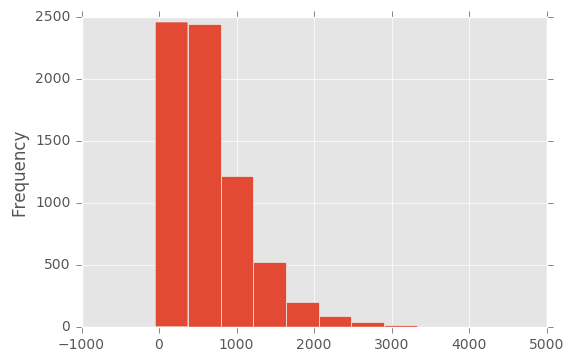

In [13]:
matches['t_first_kill'].plot(kind = 'hist')

# sen_log

In [14]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }

sen = pd.DataFrame(columns = [key for key, value in sen_cnt.items()])

for i in range(0, len(matches['sen_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0,
                't_sen_rpm_3':0,
                't_sen_rpm_5':0,
                't_sen_rpm_8':0,
                't_sen_rpm_10':0,
                't_sen_rpm_12':0,
                't_sen_rpm_15':0,
                't_sen_rpm_20':0,
                't_sen_rpm_25':0,
                't_sen_rpm_30':0    
                }
    try: 
        if matches['sen_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['sen_log'][i])):
                for timeStamp in timeStamps:
                    if matches['sen_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_sen_cnt_" + timeStamp
                        varName_rpm = "t_sen_rpm_" + timeStamp
                        sen_cnt[varName_cnt] += 1
                        sen_cnt[varName_rpm] += 1 / float(timeStamp)
            sen_cnt['id'] = matches['id'][i]
            senRow = pd.DataFrame.from_dict(sen_cnt, orient = 'index').transpose()
            sen = sen.append(senRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed


In [15]:
matches = matches.merge(sen, left_on='id', right_on='id', how='inner')
matches.shape

(7000, 112)

# Возникают новые записи в таблице, хотя используется inner join. С чем это может быть связано?

# obs_log

In [16]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }

obs = pd.DataFrame(columns = [key for key, value in obs_cnt.items()])

for i in range(0, len(matches['obs_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0,
                't_obs_rpm_3':0,
                't_obs_rpm_5':0,
                't_obs_rpm_8':0,
                't_obs_rpm_10':0,
                't_obs_rpm_12':0,
                't_obs_rpm_15':0,
                't_obs_rpm_20':0,
                't_obs_rpm_25':0,
                't_obs_rpm_30':0    
                }
    try: 
        if matches['obs_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['obs_log'][i])):
                for timeStamp in timeStamps:
                    if matches['obs_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_obs_cnt_" + timeStamp
                        varName_rpm = "t_obs_rpm_" + timeStamp
                        obs_cnt[varName_cnt] += 1
                        obs_cnt[varName_rpm] += 1 / float(timeStamp)
            obs_cnt['id'] = matches['id'][i]
            obsRow = pd.DataFrame.from_dict(obs_cnt, orient = 'index').transpose()
            obs = obs.append(obsRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed


In [17]:
matches = matches.merge(obs, left_on='id', right_on='id', how='inner')
print matches.shape

(7096, 130)


# runes_log

In [18]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }

runes = pd.DataFrame(columns = [key for key, value in runes_cnt.items()])

for i in range(0, len(matches['runes_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0,
                't_runes_rpm_3':0,
                't_runes_rpm_5':0,
                't_runes_rpm_8':0,
                't_runes_rpm_10':0,
                't_runes_rpm_12':0,
                't_runes_rpm_15':0,
                't_runes_rpm_20':0,
                't_runes_rpm_25':0,
                't_runes_rpm_30':0    
                }
    try:
        if matches['runes_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['runes_log'][i])):
                for timeStamp in timeStamps:
                    if matches['runes_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_runes_cnt_" + timeStamp
                        varName_rpm = "t_runes_rpm_" + timeStamp
                        runes_cnt[varName_cnt] += 1
                        runes_cnt[varName_rpm] += 1 / float(timeStamp)
            runes_cnt['id'] = matches['id'][i]
            runesRow = pd.DataFrame.from_dict(runes_cnt, orient = 'index').transpose()
            runes = runes.append(runesRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed
7000 Matches has been processed


In [19]:
matches = matches.merge(runes, left_on='id', right_on='id', how='inner')
matches.shape  

(14056, 148)

# buyback_log

In [20]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }

buyback = pd.DataFrame(columns = [key for key, value in buyback_cnt.items()])

for i in range(0, len(matches['buyback_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0,
                't_buyback_rpm_3':0,
                't_buyback_rpm_5':0,
                't_buyback_rpm_8':0,
                't_buyback_rpm_10':0,
                't_buyback_rpm_12':0,
                't_buyback_rpm_15':0,
                't_buyback_rpm_20':0,
                't_buyback_rpm_25':0,
                't_buyback_rpm_30':0    
                }
    try: 
        if matches['buyback_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['buyback_log'][i])):
                for timeStamp in timeStamps:
                    if matches['buyback_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_buyback_cnt_" + timeStamp
                        varName_rpm = "t_buyback_rpm_" + timeStamp
                        buyback_cnt[varName_cnt] += 1
                        buyback_cnt[varName_rpm] += 1 / float(timeStamp)
            buyback_cnt['id'] = matches['id'][i]
            buybackRow = pd.DataFrame.from_dict(buyback_cnt, orient = 'index').transpose()
            buyback = buyback.append(buybackRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed
6000 Matches has been processed
7000 Matches has been processed
8000 Matches has been processed
9000 Matches has been processed
10000 Matches has been processed
11000 Matches has been processed
12000 Matches has been processed
13000 Matches has been processed
14000 Matches has been processed


In [ ]:
matches = matches.merge(buyback, left_on='id', right_on='id', how='inner')
matches.shape

In [23]:
buyback.shape

(5186, 19)

# Откуда 4000 новых записей после Join, при условии, что таблица buyback содержит 10908 записей?

# Hero statistics

In [24]:
urlHeroes = "https://api.opendota.com/api/heroStats"

In [25]:
response = urllib2.urlopen(urlHeroes)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)

In [26]:
heroesList = list()
heroAttr = [
            'id',
            'localized_name', 
            'attack_type',
            'pro_ban', 
            'pro_pick', 
            'pro_win', 
            'primary_attr', 
            'roles'
            ]
heroRolesList = [
                'Carry',
                'Disabler',
                'Initiator',
                'Jungler',
                'Support',
                'Durable',
                'Nuker',
                'Escape',
                'Pusher'
                ]

for heroId in range(0, len(dictData) - 1):    
    heroRaw = dict()
    
    for heroRole in heroRolesList:
        heroRaw[heroRole] = 0
    for key, value in dictData[heroId].iteritems():
        if key in heroAttr:
            heroRaw[key] = dictData[heroId][key]
            if key == 'roles':
                for heroRole in dictData[heroId][key]:
                    heroRaw[heroRole] = 1
    del heroRaw['roles']                
    heroesList.append(heroRaw)

In [27]:
heroes = pd.DataFrame(heroesList)
print heroes.shape
heroes.head()

(112, 16)


,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type,id,localized_name,primary_attr,pro_ban,pro_pick,pro_win
0,1,0,0,1,0,0,1,0,0,Melee,1,Anti-Mage,agi,67.0,48.0,22.0
1,0,1,1,0,1,1,0,0,0,Melee,2,Axe,str,209.0,194.0,103.0
2,0,1,1,0,0,0,1,0,1,Ranged,3,Bane,int,1.0,19.0,10.0
3,1,1,0,0,1,1,1,0,0,Melee,4,Bloodseeker,agi,5.0,17.0,7.0
4,0,1,0,0,0,1,1,0,1,Ranged,5,Crystal Maiden,int,57.0,410.0,229.0


In [28]:
matches= matches.merge(heroes, left_on = 'hero_id', right_on = 'id', how = 'inner')
matches.shape

(200954, 180)

In [63]:
matches.head()

,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,89166519,19,Ranged,[],0.0,224,0.0,3,1454,0,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
1,135878232,13,Ranged,[],0.0,224,0.0,2,1479,65,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
2,89166519,4,Ranged,[],0.0,224,0.0,6,1524,3,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
3,90892734,14,Ranged,"[{u'slot': 4, u'type': u'buyback_log', u'playe...",0.0,224,0.0,6,2983,4,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
4,90892734,12,Ranged,"[{u'slot': 9, u'type': u'buyback_log', u'playe...",0.0,224,0.0,4,1859,76,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0


# EXP_RPM

In [29]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'experience'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# GOLD_RPM

In [30]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'gold'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# LASTHITS_RPM

In [31]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'lasthits'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

In [32]:
for col in list(matches):
    print col

account_id
assists
attack_type_x
buyback_log
camps_stacked
cluster
creeps_stacked
deaths
denies
duration
first_blood_time
gold_per_min
gold_spent
hero_damage
hero_healing
hero_id
kills
kills_log
last_hits
leagueid
leaguename
level
localized_name_x
match_id
obs_log
ping_log
player_slot
primary_attr_x
purchase_log
role_log
runes_log
sen_log
start_time
stuns
t_experience_cnt_10
t_experience_cnt_12
t_experience_cnt_15
t_experience_cnt_20
t_experience_cnt_25
t_experience_cnt_3
t_experience_cnt_30
t_experience_cnt_5
t_experience_cnt_8
t_gold_cnt_10
t_gold_cnt_12
t_gold_cnt_15
t_gold_cnt_20
t_gold_cnt_25
t_gold_cnt_3
t_gold_cnt_30
t_gold_cnt_5
t_gold_cnt_8
t_lasthits_cnt_10
t_lasthits_cnt_12
t_lasthits_cnt_15
t_lasthits_cnt_20
t_lasthits_cnt_25
t_lasthits_cnt_3
t_lasthits_cnt_30
t_lasthits_cnt_5
t_lasthits_cnt_8
team_id
tower_damage
win
xp_per_min
id_x
datetime
t_item_aether_lens
t_item_arcane_boots
t_item_black_king_bar
t_item_blade_mail
t_item_blink
t_item_boots
t_item_bottle
t_item_desolat

# Заметка: после join появляются id_x и id_y - айдишники правых и левых таблиц

In [33]:
print matches['id_x'].unique().size

4349


In [34]:
print matches['id_y'].unique().size

110


# Используем id_x в качестве уникального id.
Аналог SQL select distinct id_x from matches (Удаляем дубликаты)

In [35]:
matches.drop_duplicates(subset = 'id_x', inplace = True)

In [36]:
matches.shape

(4349, 207)

In [37]:
matchesWithoutLogs = matches.drop(labels = ['buyback_log', 'kills_log', 'obs_log', 'ping_log', 'purchase_log', 'role_log', 'runes_log', 'sen_log'], axis = 1)

In [38]:
matchesWithoutLogs.to_csv('ABT_24_04_2017.csv', na_rep = 'NaN', sep = ';')